In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

applications_df = pd.read_csv('applications.csv', low_memory=False)
branches_df = pd.read_csv('branches.csv')
customers_df = pd.read_csv('customers.csv')
defaults_df = pd.read_csv('defaults.csv')
loans_df = pd.read_csv('loans.csv')
transactions_df = pd.read_csv('transactions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'applications.csv'

In [2]:
#Task1: Data Quality and Preparation
# Missing Values in applications, branches, customers, defaults, loans, and transactions
applications_missing = applications_df.isnull().sum()
branches_missing = branches_df.isnull().sum()
customers_missing = customers_df.isnull().sum()
defaults_missing = defaults_df.isnull().sum()
loans_missing = loans_df.isnull().sum()
transactions_missing = transactions_df.isnull().sum()

applications_missing, branches_missing, customers_missing, defaults_missing, loans_missing , transactions_missing


(Application_ID          0
 Loan_ID             12600
 Customer_ID             0
 Application_Date        0
 Approval_Date       12600
 Loan_Purpose            0
 Source_Channel          0
 Processing_Fee          0
 Approval_Status         0
 Rejection_Reason    70000
 dtype: int64,
 Branch_ID                     0
 Branch_Name                   0
 Region                        0
 Total_Customers               0
 Total_Active_Loans            0
 Delinquent_Loans              0
 Loan_Disbursement_Amount      0
 Avg_Processing_Time           0
 Relationship_Manager_Count    0
 dtype: int64,
 Customer_ID                0
 Full_Name                  0
 Contact_Number             0
 Email                      0
 Address                    0
 Age                        0
 Gender                     0
 Marital_Status             0
 Employment_Status          0
 Annual_Income              0
 Credit_Score               0
 Region                     0
 Account_Tenure             0
 Relationship

In [3]:
# Convert date columns to datetime format
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'], errors='coerce')
applications_df['Approval_Date'] = pd.to_datetime(applications_df['Approval_Date'], errors='coerce')
applications_df['Application_ID'] = applications_df['Application_ID'].astype(str)
applications_df['Loan_ID'] = applications_df['Loan_ID'].astype(str)
applications_df['Customer_ID'] = applications_df['Customer_ID'].astype(str)
applications_df.dtypes

Application_ID              object
Loan_ID                     object
Customer_ID                 object
Application_Date    datetime64[ns]
Approval_Date       datetime64[ns]
Loan_Purpose                object
Source_Channel              object
Processing_Fee               int64
Approval_Status             object
Rejection_Reason            object
dtype: object

In [4]:
# Convert Default_Date to datetime format
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'], errors='coerce')
defaults_df.dtypes

Default_ID                 object
Loan_ID                    object
Customer_ID                object
Default_Date       datetime64[ns]
Default_Amount              int64
Default_Reason             object
Recovery_Status            object
Recovery_Amount             int64
Legal_Action               object
dtype: object

In [5]:
loans_data_types = loans_df.dtypes
loans_data_types

Loan_ID                  object
Customer_ID              object
Loan_Amount               int64
Interest_Rate           float64
Loan_Term                 int64
Disbursal_Date           object
Repayment_Start_Date     object
Repayment_End_Date       object
Loan_Status              object
Overdue_Amount            int64
EMI_Amount                int64
Collateral_Details       object
dtype: object

In [6]:
# Convert date columns to datetime format
loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'], errors='coerce')
loans_df['Repayment_Start_Date'] = pd.to_datetime(loans_df['Repayment_Start_Date'], errors='coerce')
loans_df['Repayment_End_Date'] = pd.to_datetime(loans_df['Repayment_End_Date'], errors='coerce')

loans_df.dtypes

Loan_ID                         object
Customer_ID                     object
Loan_Amount                      int64
Interest_Rate                  float64
Loan_Term                        int64
Disbursal_Date          datetime64[ns]
Repayment_Start_Date    datetime64[ns]
Repayment_End_Date      datetime64[ns]
Loan_Status                     object
Overdue_Amount                   int64
EMI_Amount                       int64
Collateral_Details              object
dtype: object

In [7]:
transactions_data_types = transactions_df.dtypes
transactions_data_types

Transaction_ID       object
Loan_ID              object
Customer_ID          object
Transaction_Date     object
Payment_Type         object
Amount                int64
Overdue_Fee           int64
Remaining_Balance     int64
Mode_of_Payment      object
dtype: object

In [8]:
# Convert Transaction_Date to datetime format
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'], errors='coerce')
transactions_df.dtypes

Transaction_ID               object
Loan_ID                      object
Customer_ID                  object
Transaction_Date     datetime64[ns]
Payment_Type                 object
Amount                        int64
Overdue_Fee                   int64
Remaining_Balance             int64
Mode_of_Payment              object
dtype: object

In [9]:
#Step 2: Descriptive statistics

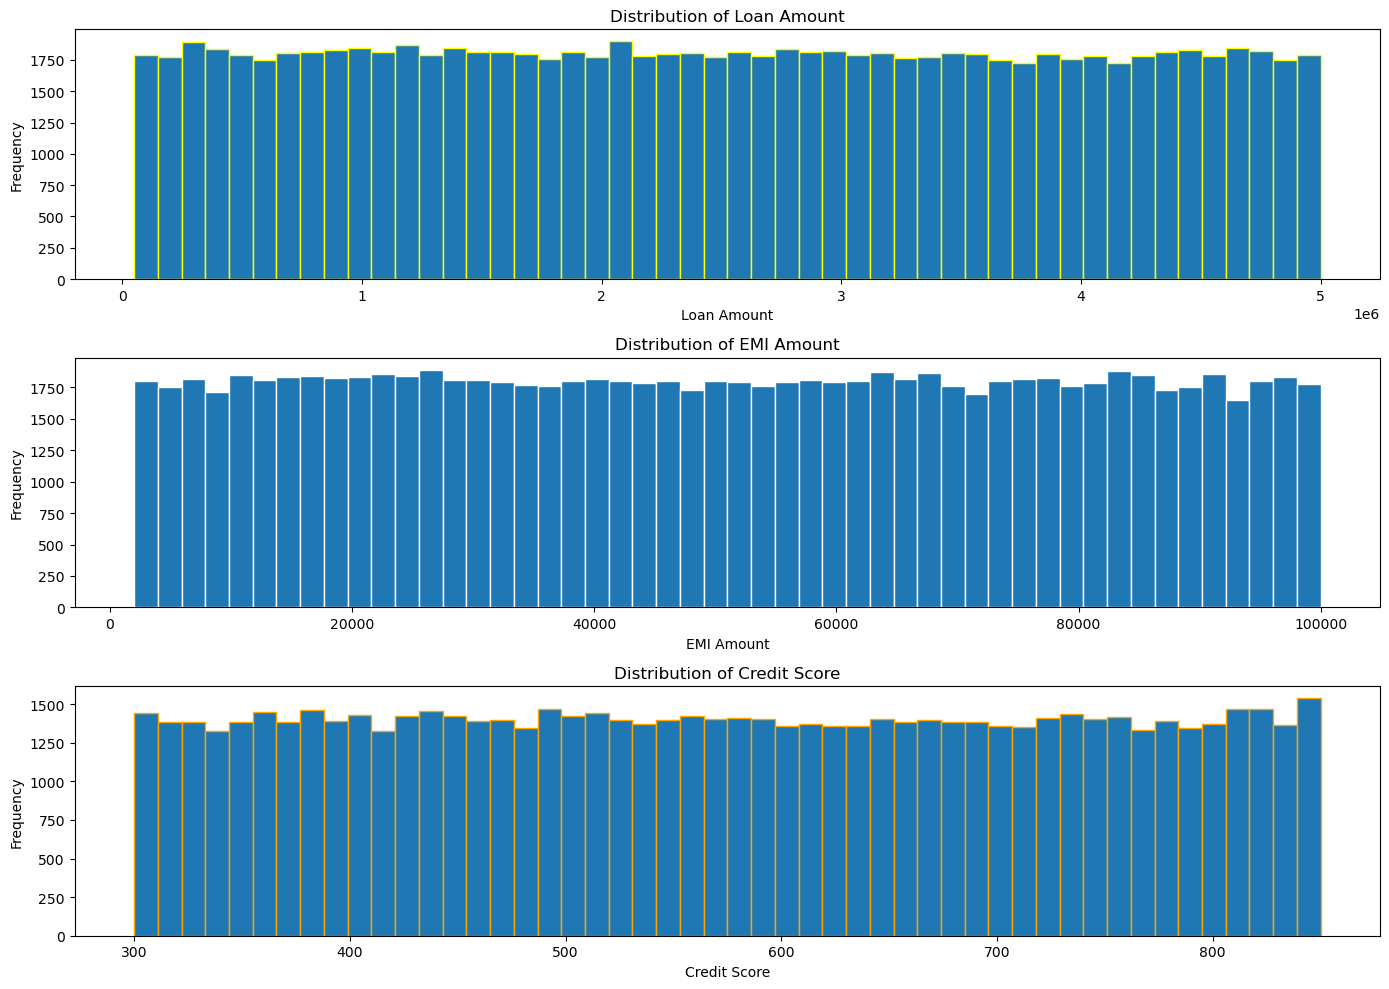

(count    9.000000e+04
 mean     2.516259e+06
 std      1.429289e+06
 min      5.002600e+04
 25%      1.275705e+06
 50%      2.510076e+06
 75%      3.751702e+06
 max      4.999958e+06
 Name: Loan_Amount, dtype: float64,
 count     90000.000000
 mean      50874.181444
 std       28274.305704
 min        2001.000000
 25%       26229.750000
 50%       50861.000000
 75%       75431.250000
 max      100000.000000
 Name: EMI_Amount, dtype: float64,
 count    70000.000000
 mean       574.559529
 std        159.206118
 min        300.000000
 25%        437.000000
 50%        573.000000
 75%        713.000000
 max        850.000000
 Name: Credit_Score, dtype: float64)

In [10]:
# Distribution of Loan_Amount, EMI_Amount, and Credit_Score.

import matplotlib.pyplot as plt

loan_amount_stats = loans_df['Loan_Amount'].describe()
emi_amount_stats = loans_df['EMI_Amount'].describe()
credit_score_stats = customers_df['Credit_Score'].describe()

plt.figure(figsize=(14, 10))

# Loan Amount graph
plt.subplot(3, 1, 1)
plt.hist(loans_df['Loan_Amount'], bins=50, edgecolor='yellow')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# EMI Amount graph
plt.subplot(3, 1, 2)
plt.hist(loans_df['EMI_Amount'], bins=50, edgecolor='white')
plt.title('Distribution of EMI Amount')
plt.xlabel('EMI Amount')
plt.ylabel('Frequency')

# Credit Score graph
plt.subplot(3, 1, 3)
plt.hist(customers_df['Credit_Score'], bins=50, edgecolor='orange')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

loan_amount_stats, emi_amount_stats, credit_score_stats



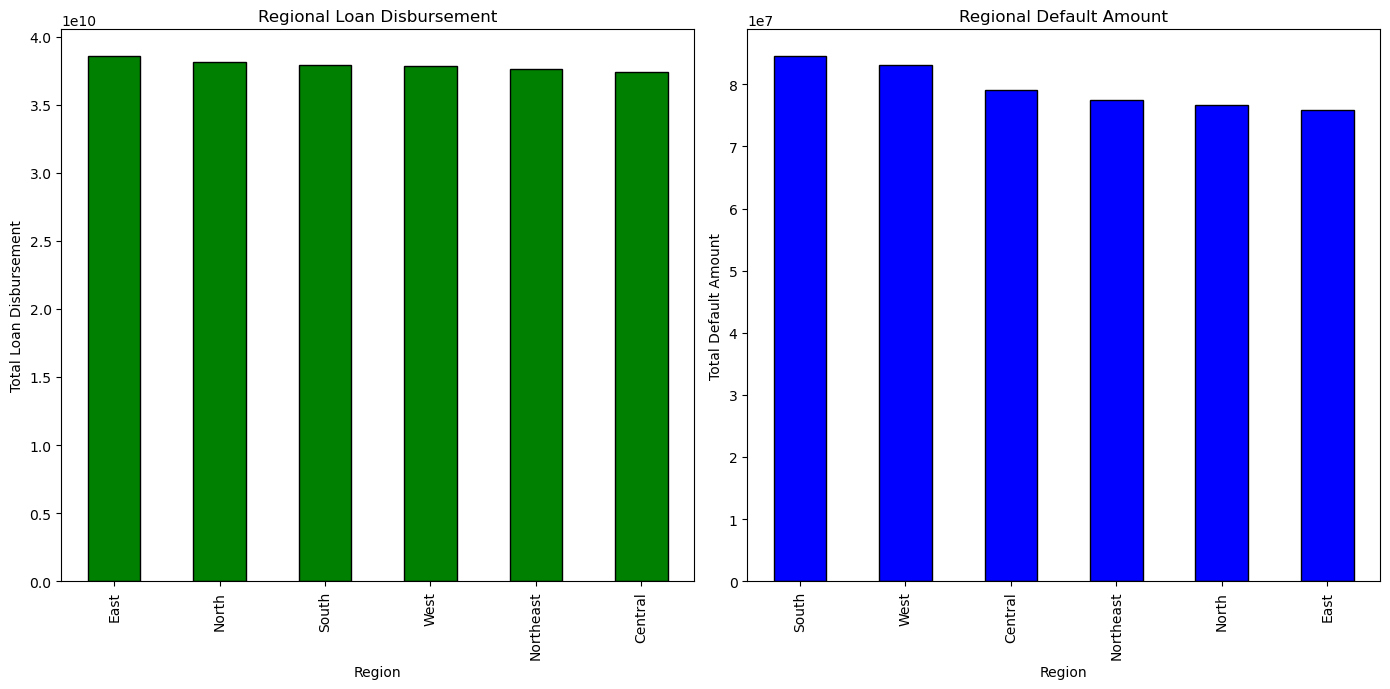

(count    9.000000e+04
 mean     2.516259e+06
 std      1.429289e+06
 min      5.002600e+04
 25%      1.275705e+06
 50%      2.510076e+06
 75%      3.751702e+06
 max      4.999958e+06
 Name: Loan_Amount, dtype: float64,
 count     90000.000000
 mean      50874.181444
 std       28274.305704
 min        2001.000000
 25%       26229.750000
 50%       50861.000000
 75%       75431.250000
 max      100000.000000
 Name: EMI_Amount, dtype: float64,
 count    70000.000000
 mean       574.559529
 std        159.206118
 min        300.000000
 25%        437.000000
 50%        573.000000
 75%        713.000000
 max        850.000000
 Name: Credit_Score, dtype: float64)

In [11]:
# Regional trends in loan disbursement and defaults.
loans_branches_df = loans_df.merge(customers_df[['Customer_ID', 'Region']], on='Customer_ID', how='left')
loans_branches_defaults_df = loans_branches_df.merge(defaults_df[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
regional_loan_disbursement = loans_branches_defaults_df.groupby('Region')['Loan_Amount'].sum().sort_values(ascending=False)
regional_default_amount = loans_branches_defaults_df.groupby('Region')['Default_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
regional_loan_disbursement.plot(kind='bar', color='green', edgecolor='black')
plt.title('Regional Loan Disbursement')
plt.xlabel('Region')
plt.ylabel('Total Loan Disbursement')

plt.subplot(1, 2, 2)
regional_default_amount.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Regional Default Amount')
plt.xlabel('Region')
plt.ylabel('Total Default Amount')

plt.tight_layout()
plt.show()

loan_amount_stats, emi_amount_stats, credit_score_stats

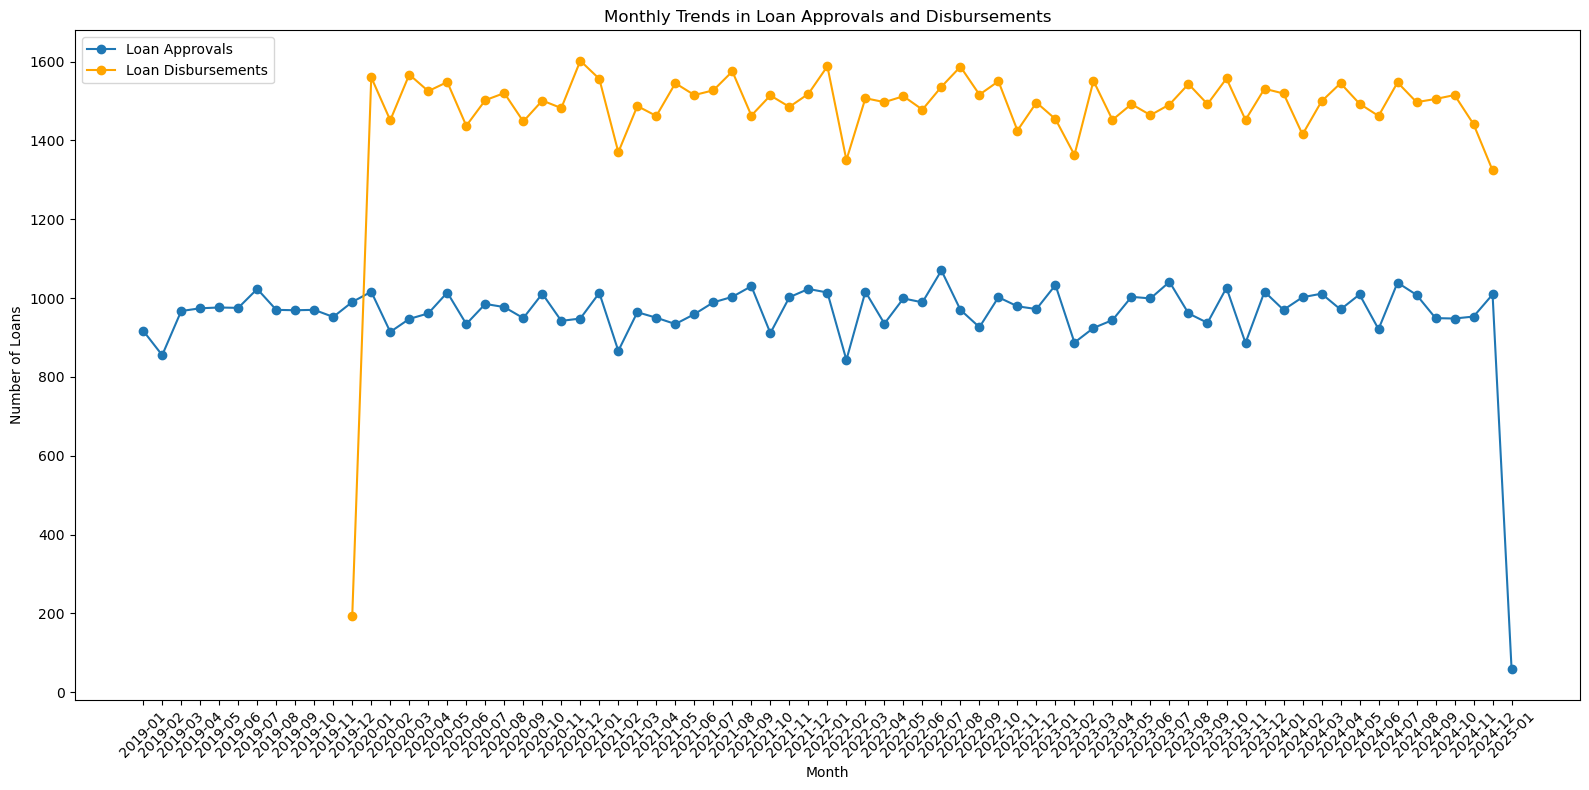

In [12]:
# Preparing data for monthly trends in loan approvals and disbursements
applications_df['Application_Month'] = applications_df['Application_Date'].dt.to_period('M')
loans_df['Disbursal_Month'] = loans_df['Disbursal_Date'].dt.to_period('M')
monthly_approvals = applications_df[applications_df['Approval_Status'] == 'Approved'].groupby('Application_Month').size()
monthly_disbursements = loans_df.groupby('Disbursal_Month').size()

monthly_approvals = monthly_approvals.sort_index()
monthly_disbursements = monthly_disbursements.sort_index()


plt.figure(figsize=(16, 8))


plt.plot(monthly_approvals.index.astype(str), monthly_approvals, marker='o', label='Loan Approvals')


plt.plot(monthly_disbursements.index.astype(str), monthly_disbursements, marker='o', label='Loan Disbursements', color='orange')

plt.xticks(rotation=45)
plt.title('Monthly Trends in Loan Approvals and Disbursements')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
#Step 3. Default Risk Analysis

In [14]:
#Correlation Between Loan Attributes and Defaults

customers_df['Credit_Score'] = pd.to_numeric(customers_df['Credit_Score'], errors='coerce')

loans_defaults = loans_df.merge(defaults_df[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
loans_defaults['Default_Flag'] = np.where(loans_defaults['Default_Amount'].isnull(), 0, 1)

loans_defaults = loans_defaults.merge(customers_df[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')
correlation_data = loans_defaults[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']]
correlation_matrix = correlation_data.corr()
correlation_matrix

,Loan_Amount,Interest_Rate,Credit_Score,Default_Flag
Loan_Amount,1.000000,-0.003451,0.000262,-0.002401
Interest_Rate,-0.003451,1.000000,0.002498,-0.004763
Credit_Score,0.000262,0.002498,1.000000,-0.001724
Default_Flag,-0.002401,-0.004763,-0.001724,1.000000


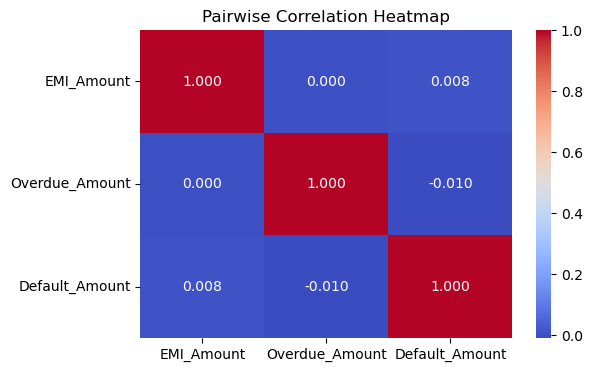

In [15]:
# Pairwise correlation analysis

pairwise_data = loans_defaults[['EMI_Amount', 'Overdue_Amount', 'Default_Amount']]
pairwise_corr = pairwise_data.corr()


plt.figure(figsize=(6, 4))
sns.heatmap(pairwise_corr, annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()


In [16]:
# Correlation Between Branch Metrics and Defaults
branch_defaults = branches_df.merge(
    loans_df[['Loan_ID', 'Customer_ID', 'Loan_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Customer_ID'
).merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

branch_analysis = branch_defaults.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum'
}).reset_index()

branch_analysis['Default_Rate'] = (
    branch_analysis['Default_Amount'] / branch_analysis['Loan_Disbursement_Amount']
) * 100

branch_analysis.head()

,Branch_ID,Delinquent_Loans,Loan_Disbursement_Amount,Default_Amount,Default_Rate
0,B001,21,341680882,0.0,0.0
1,B002,149,96549019,0.0,0.0
2,B003,168,445787808,0.0,0.0
3,B004,96,353934299,0.0,0.0
4,B005,87,311637902,0.0,0.0


In [17]:
#Step.4: Branch and Regional Performance

In [18]:
# Branches Ranking by disbursement.
branch_disb_ranking = branches_df[['Branch_ID', 'Branch_Name', 'Loan_Disbursement_Amount']]
branch_disbursement_ranked = branch_disb_ranking.sort_values(by='Loan_Disbursement_Amount', ascending=False).reset_index(drop=True)
branch_disbursement_ranked.head()


,Branch_ID,Branch_Name,Loan_Disbursement_Amount
0,B036,Kara-Bahl,499562869
1,B014,"Bhatti, Rau and Sem",482327541
2,B012,Kaul Inc,465469874
3,B048,Chawla-Subramanian,464419943
4,B035,"Malhotra, Boase and Malhotra",449109596


In [19]:
# Branches ranking by processing time efficiency

branch_processing_efficiency = branches_df[['Branch_ID', 'Branch_Name', 'Avg_Processing_Time']]
branch_processing_efficiency_ranked = branch_processing_efficiency.sort_values(by='Avg_Processing_Time').reset_index(drop=True)
branch_processing_efficiency_ranked.head()


,Branch_ID,Branch_Name,Avg_Processing_Time
0,B050,Sani-Kale,1
1,B047,Chawla-Tandon,2
2,B042,Kar-Jaggi,2
3,B018,"Sandhu, Magar and Sachdeva",2
4,B045,Solanki-Shah,3


In [20]:
# Ranking branches by default rates and recovery 

branch_defaults = branches_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Loan_ID'
)

branch_metrics = branch_defaults.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

branch_metrics['Default_Rate'] = (branch_metrics['Default_Amount'] / branch_metrics['Loan_Disbursement_Amount']) * 100
branch_metrics['Recovery_Rate'] = (branch_metrics['Recovery_Amount'] / branch_metrics['Default_Amount']) * 100
branch_metrics_sorted = branch_metrics.sort_values(by='Default_Rate', ascending=False)

branch_metrics_sorted.head()

,Branch_ID,Delinquent_Loans,Loan_Disbursement_Amount,Default_Amount,Recovery_Amount,Default_Rate,Recovery_Rate
0,B001,21,341680882,0.0,0.0,0.0,NaN
37,B038,113,86826078,0.0,0.0,0.0,NaN
27,B028,70,393550434,0.0,0.0,0.0,NaN
28,B029,135,234351532,0.0,0.0,0.0,NaN
29,B030,18,15022525,0.0,0.0,0.0,NaN


In [21]:
# Region wise performance
branch_performance = branches_df.groupby('Region').agg({
    'Loan_Disbursement_Amount': 'sum',
    'Delinquent_Loans': 'sum',
    'Total_Active_Loans': 'sum'
}).reset_index()
branch_performance['Delinquency_Rate'] = (
    branch_performance['Delinquent_Loans'] / branch_performance['Total_Active_Loans']
) * 100
branch_performance_sorted = branch_performance.sort_values(by='Loan_Disbursement_Amount', ascending=False)
branch_performance_sorted

,Region,Loan_Disbursement_Amount,Delinquent_Loans,Total_Active_Loans,Delinquency_Rate
0,Central,3316048302,994,8715,11.405622
2,North,3296073904,1504,11965,12.569996
1,East,2006676282,756,8929,8.466794
5,West,1990828641,441,6861,6.427634
4,South,1694906506,846,9235,9.160801
3,Northeast,442827845,487,5174,9.412447


In [22]:
#Step 5: Customer Segmentation

In [23]:
# Categorizing customers by income levels
customers_df['Income_Segment'] = pd.cut(customers_df['Annual_Income'],
    bins=[0, 500000, 1000000, 2000000, 5000000, float('inf')],
    labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])

# Categorizing customers by credit score levels
customers_df['Credit_Score_Segment'] = pd.cut(customers_df['Credit_Score'],
    bins=[0, 300, 500, 700, 850],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

# Merging customers with loans to identify loan status
customer_segments = customers_df.merge(
    loans_df[['Customer_ID', 'Loan_Status']],
    on='Customer_ID',
    how='left'
)

# Aggregating segments to summarize
segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status'], observed=False).size().reset_index(name='Customer_Count' )


segmentation_summary

,Income_Segment,Credit_Score_Segment,Loan_Status,Customer_Count
0,Low,Poor,Active,8
1,Low,Poor,Closed,11
2,Low,Poor,Overdue,7
3,Low,Fair,Active,1852
4,Low,Fair,Closed,1841
5,Low,Fair,Overdue,1777
6,Low,Good,Active,1818
7,Low,Good,Closed,1801
8,Low,Good,Overdue,1839
9,Low,Excellent,Active,1378


In [24]:
# High-risk and high-value customer groups
customer_segments['Risk_Level'] = 'Low-Risk'
customer_segments.loc[
    (customer_segments['Credit_Score_Segment'].isin(['Poor', 'Fair'])) &
    (customer_segments['Loan_Status'].isin(['Active', 'Defaulted'])),
    'Risk_Level'
] = 'High-Risk'

customer_segments['Value_Level'] = 'Low-Value'
customer_segments.loc[
    (customer_segments['Credit_Score_Segment'] == 'Excellent') &
    (customer_segments['Loan_Status'] == 'Active'),
    'Value_Level'
] = 'High-Value'

risk_value_summary = customer_segments.groupby(['Risk_Level', 'Value_Level']).size().reset_index(name='Customer_Count')


risk_value_summary

,Risk_Level,Value_Level,Customer_Count
0,High-Risk,Low-Value,11064
1,Low-Risk,High-Value,8209
2,Low-Risk,Low-Value,90051


In [25]:
# Repayment behavior across segments

repayment_behavior = transactions_df.merge(
    customer_segments[['Customer_ID', 'Income_Segment', 'Credit_Score_Segment', 'Risk_Level', 'Value_Level']],
    on='Customer_ID',
    how='left'
)
repayment_summary = repayment_behavior.groupby(
    ['Income_Segment', 'Credit_Score_Segment', 'Risk_Level', 'Value_Level', 'Payment_Type',], observed=False ).agg({
    'Amount': 'sum',
    'Overdue_Fee': 'sum',
    'Remaining_Balance': 'mean'
}).reset_index()

repayment_summary

,Income_Segment,Credit_Score_Segment,Risk_Level,Value_Level,Payment_Type,Amount,Overdue_Fee,Remaining_Balance
0,Low,Poor,High-Risk,High-Value,EMI,0,0,NaN
1,Low,Poor,High-Risk,High-Value,Penalty,0,0,NaN
2,Low,Poor,High-Risk,Low-Value,EMI,1966121,89392,1.145499e+06
3,Low,Poor,High-Risk,Low-Value,Penalty,1545704,62655,1.103916e+06
4,Low,Poor,Low-Risk,High-Value,EMI,0,0,NaN
...,...,...,...,...,...,...,...,...
155,High,Excellent,High-Risk,Low-Value,Penalty,0,0,NaN
156,High,Excellent,Low-Risk,High-Value,EMI,0,0,NaN
157,High,Excellent,Low-Risk,High-Value,Penalty,0,0,NaN
158,High,Excellent,Low-Risk,Low-Value,EMI,0,0,NaN


In [26]:
#Step 6: Advanced Statistical Analysis

In [27]:
# Correlation Analysis for Default Risks

default_risk_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
).merge(
    customers_df[['Customer_ID', 'Credit_Score']],
    on='Customer_ID',
    how='left'
)
default_risk_data['Default_Flag'] = default_risk_data['Default_Amount'].notnull().astype(int)
key_variables = ['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Overdue_Amount', 'Default_Flag']
correlation_matrix_risk = default_risk_data[key_variables].corr()
correlation_matrix_risk

,Credit_Score,Loan_Amount,Interest_Rate,Overdue_Amount,Default_Flag
Credit_Score,1.000000,0.000262,0.002498,0.001990,-0.001724
Loan_Amount,0.000262,1.000000,-0.003451,0.008249,-0.002401
Interest_Rate,0.002498,-0.003451,1.000000,-0.002700,-0.004763
Overdue_Amount,0.001990,0.008249,-0.002700,1.000000,0.000020
Default_Flag,-0.001724,-0.002401,-0.004763,0.000020,1.000000


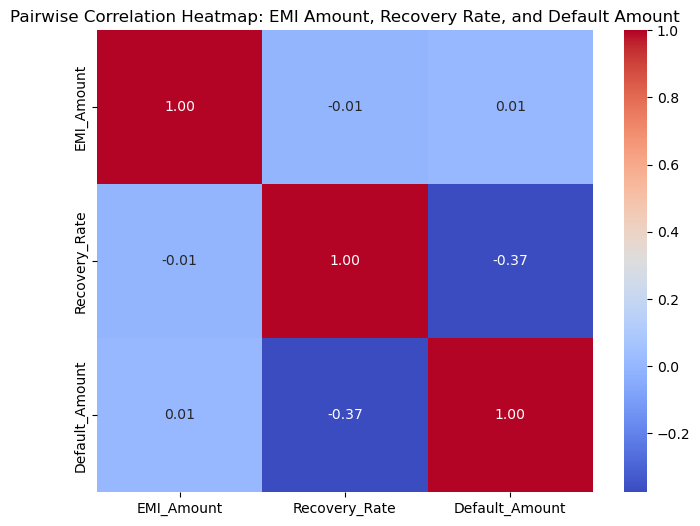

In [28]:
#Pairwise Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    on='Loan_ID',
    how='left'
)

heatmap_data['Recovery_Rate'] = (heatmap_data['Recovery_Amount'] / heatmap_data['Default_Amount']) * 100
heatmap_columns = ['EMI_Amount', 'Recovery_Rate', 'Default_Amount']
heatmap_data_filtered = heatmap_data[heatmap_columns].dropna()

correlation_heatmap = heatmap_data_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap: EMI Amount, Recovery Rate, and Default Amount')
plt.show()

In [29]:
# Branch-Level Correlation

branch_performance_data = branches_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Loan_ID'
)
branch_performance_summary = branch_performance_data.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

branch_performance_summary['Recovery_Rate'] = (
    branch_performance_summary['Recovery_Amount'] / branch_performance_summary['Default_Amount']
) * 100
branch_correlation_matrix = branch_performance_summary[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Rate']].corr()
branch_correlation_matrix


,Delinquent_Loans,Loan_Disbursement_Amount,Recovery_Rate
Delinquent_Loans,1.000000,0.023648,NaN
Loan_Disbursement_Amount,0.023648,1.000000,NaN
Recovery_Rate,NaN,NaN,NaN


In [30]:
#Step 7: Transaction and Recovery Analysis

In [31]:
penalty_analysis = transactions_df.groupby('Payment_Type').agg({
    'Amount': 'sum',
    'Overdue_Fee': 'sum'
}).reset_index()
transactions_df['Transaction_Month'] = pd.to_datetime(transactions_df['Transaction_Date'], errors='coerce').dt.to_period('M')
overdue_trends = transactions_df.groupby('Transaction_Month').agg({
    'Overdue_Fee': 'sum'
}).reset_index()
penalty_analysis, overdue_trends.head()


(  Payment_Type      Amount  Overdue_Fee
 0          EMI  6302557017    314714263
 1      Penalty  6318173036    315585516,
   Transaction_Month  Overdue_Fee
 0           2019-12      1285371
 1           2020-01     10632607
 2           2020-02     10326010
 3           2020-03     10563729
 4           2020-04     10138560)

In [32]:
# Analyze recovery rates by Default_Reason and Legal_Action
recovery_analysis = defaults_df.groupby(['Default_Reason', 'Legal_Action']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_analysis['Recovery_Rate'] = (
    recovery_analysis['Recovery_Amount'] / recovery_analysis['Default_Amount']
) * 100
recovery_analysis.head()

,Default_Reason,Legal_Action,Default_Amount,Recovery_Amount,Recovery_Rate
0,Business Failure,No,60275246,14962918,24.824317
1,Business Failure,Yes,61650737,14855675,24.096508
2,Job Loss,No,57241270,13068979,22.831392
3,Job Loss,Yes,56236139,13766243,24.479353
4,Medical Emergency,No,62314181,15495404,24.866577


In [33]:
# Compare recovery rates across regions and branches.

recovery_region_branch = defaults_df.merge(
    customers_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
).merge(
    branches_df[['Branch_ID', 'Region']],
    on='Region',
    how='left'
)
recovery_comparison = recovery_region_branch.groupby(['Region', 'Branch_ID']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_comparison['Recovery_Rate'] = (
    recovery_comparison['Recovery_Amount'] / recovery_comparison['Default_Amount']
) * 100
recovery_comparison_sorted = recovery_comparison.sort_values(by='Recovery_Rate', ascending=False)
recovery_comparison_sorted.head()


,Region,Branch_ID,Default_Amount,Recovery_Amount,Recovery_Rate
37,South,B011,60965366,15766509,25.861419
43,South,B045,60965366,15766509,25.861419
42,South,B039,60965366,15766509,25.861419
41,South,B033,60965366,15766509,25.861419
40,South,B031,60965366,15766509,25.861419


In [34]:
#Step 8: EMI Analysis

In [35]:
# Relation b/w EMI and default probabilities.
emi_analysis_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)
emi_analysis_data['Default_Flag'] = emi_analysis_data['Default_Amount'].notnull().astype(int)
emi_default_probability = emi_analysis_data.groupby('EMI_Amount').agg({
    'Default_Flag': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Default_Flag': 'Default_Probability', 'Loan_ID': 'Loan_Count'})
# Identifying thresholds for EMI amounts
emi_default_probability_sorted = emi_default_probability.sort_values(by='Default_Probability', ascending=False)
# EMI trends across loan types
emi_trends_by_loan_type = emi_analysis_data.groupby(['Loan_Status', 'EMI_Amount']).size().reset_index(name='Count')
emi_default_probability_sorted.head(), emi_trends_by_loan_type.head()

(       EMI_Amount  Default_Probability  Loan_Count
 58966      100000                  1.0           1
 46932       79921                  1.0           1
 13935       24930                  1.0           1
 56817       96444                  1.0           1
 13914       24901                  1.0           1,
   Loan_Status  EMI_Amount  Count
 0      Active        2001      1
 1      Active        2006      1
 2      Active        2007      1
 3      Active        2011      1
 4      Active        2014      1)

In [36]:
#Step 9. Loan Application Insights

In [37]:
# Calculating approval and rejection rates
approval_rejection_rates = applications_df['Approval_Status'].value_counts(normalize=True) * 100

# Identifying the most common reasons for loan rejection
rejection_reasons = applications_df[applications_df['Approval_Status'] == 'Rejected']['Rejection_Reason'].value_counts()

# Comparing processing fees between approved and rejected applications
processing_fee_comparison = applications_df.groupby('Approval_Status').agg({
    'Processing_Fee': ['mean', 'median', 'std']
}).reset_index()

approval_rejection_rates, rejection_reasons.head(), processing_fee_comparison

(Approval_Status
 Approved    84.745763
 Rejected    15.254237
 Name: proportion, dtype: float64,
 Rejection_Reason
 Low Credit Score        4297
 Incomplete Documents    4204
 Insufficient Income     4099
 Name: count, dtype: int64,
   Approval_Status Processing_Fee                     
                             mean  median          std
 0        Approved    5252.395014  5256.0  2741.573413
 1        Rejected    5255.141587  5271.0  2721.010522)

In [38]:
#Step 10. Recovery Effectiveness

In [39]:
# Recovery effectiveness
defaults_df['Recovery_Rate'] = (defaults_df['Recovery_Amount'] / defaults_df['Default_Amount']) * 100

#Compare recovery rates
recovery_by_legal_action = defaults_df.groupby('Legal_Action').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_by_legal_action['Recovery_Rate'] = (recovery_by_legal_action['Recovery_Amount'] / recovery_by_legal_action['Default_Amount']) * 100

# Branch-wise recovery performance
branch_recovery_performance = defaults_df.merge(
    branches_df[['Branch_ID', 'Region']],
    left_on='Customer_ID',
    right_on='Branch_ID',
    how='right'
).groupby(['Branch_ID', 'Region']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
branch_recovery_performance['Recovery_Rate'] = (branch_recovery_performance['Recovery_Amount'] / branch_recovery_performance['Default_Amount']) * 100

recovery_by_legal_action, branch_recovery_performance.head()

(  Legal_Action  Default_Amount  Recovery_Amount  Recovery_Rate
 0           No       242087969         58458449      24.147606
 1          Yes       234719788         57461364      24.480835,
   Branch_ID   Region  Default_Amount  Recovery_Amount  Recovery_Rate
 0      B001     West             0.0              0.0            NaN
 1      B002     East             0.0              0.0            NaN
 2      B003  Central             0.0              0.0            NaN
 3      B004     East             0.0              0.0            NaN
 4      B005    South             0.0              0.0            NaN)

In [40]:
#Step 11. Loan Disbursement Efficiency

In [126]:
# Ensuring date columns are properly formatted for analysis
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'], errors='coerce')
applications_df['Approval_Date'] = pd.to_datetime(applications_df['Approval_Date'], errors='coerce')
loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'], errors='coerce')

# Merging applications with loans for efficiency analysis
disbursement_efficiency = applications_df.merge(
    loans_df[['Loan_ID', 'Customer_ID', 'Disbursal_Date', 'Loan_Status']],
    on='Loan_ID',
    how='left'
)

# Calculate processing time (days from application to disbursement)
disbursement_efficiency['Processing_Time'] = (
    disbursement_efficiency['Disbursal_Date'] - disbursement_efficiency['Application_Date']
).dt.days

# Average processing times across loan purposes
processing_by_purpose = disbursement_efficiency.groupby('Loan_Purpose').agg({
    'Processing_Time': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Processing_Time': 'Avg_Processing_Time', 'Loan_ID': 'Loan_Count'})

processing_by_purpose.head()

,Loan_Purpose,Avg_Processing_Time,Loan_Count
0,Business,163.725259,16518
1,Education,163.347602,16382
2,Home Renovation,180.352079,16590
3,Personal,173.193014,16466
4,Vehicle,180.269097,16644


In [ ]:
#Step 12. Profitability Analysis

In [86]:
loans_df['Total_Interest_Income'] = (
    loans_df['Loan_Amount'] * (loans_df['Interest_Rate'] / 100) * (loans_df['Loan_Term'] / 12)
)

# Total interest income generated across all loans
total_interest_income = loans_df['Total_Interest_Income'].sum()

# Identifying the most profitable loan purposes
profit_by_purpose = loans_df.merge(
    applications_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
).groupby('Loan_Purpose').agg({
    'Total_Interest_Income': 'sum',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Total_Interest_Income': 'Total_Profit', 'Loan_ID': 'Loan_Count'})

# Comparing profitability metrics across regions
profit_by_region = loans_df.merge(
    customers_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
).groupby('Region').agg({
    'Total_Interest_Income': 'sum',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Total_Interest_Income': 'Total_Profit', 'Loan_ID': 'Loan_Count'})


total_interest_income, profit_by_purpose.head(), profit_by_region.head()

(75037526934.92249,
       Loan_Purpose  Total_Profit  Loan_Count
 0         Business  1.174041e+10       13995
 1        Education  1.166138e+10       13970
 2  Home Renovation  1.162827e+10       13994
 3         Personal  1.146694e+10       13942
 4          Vehicle  1.184490e+10       14099,
       Region  Total_Profit  Loan_Count
 0    Central  1.234785e+10       14849
 1       East  1.263948e+10       15316
 2      North  1.262674e+10       15041
 3  Northeast  1.248872e+10       14944
 4      South  1.239625e+10       14949)

In [ ]:
#Step 13. Geospatial Analysis

In [88]:
active_loans = loans_df[loans_df['Loan_Status'] == 'Active'].merge(
    customers_df[['Customer_ID', 'Region', 'Address']],
    on='Customer_ID',
    how='left'
)

# Map distribution of active loans across regions
active_loans_by_region = active_loans.groupby('Region').agg({
    'Loan_ID': 'count',
    'Loan_Amount': 'sum'
}).reset_index().rename(columns={'Loan_ID': 'Active_Loan_Count', 'Loan_Amount': 'Total_Loan_Amount'})

# Default rates across regions
defaults_with_regions = defaults_df.merge(
    customers_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

default_rates_by_region = defaults_with_regions.groupby('Region').agg({
    'Default_Amount': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Default_Case_Count'})
default_rates_by_region['Default_Rate'] = (
    defaults_with_regions.groupby('Region')['Default_Amount'].sum()
    / active_loans_by_region.set_index('Region')['Total_Loan_Amount']
).reset_index(drop=True)

# Urban vs. rural loan disbursement trends
loan_disbursement_trends = customers_df.merge(
    loans_df[['Customer_ID', 'Loan_Amount', 'Loan_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Region', 'Loan_Status']).agg({
    'Loan_Amount': 'sum'
}).reset_index()

active_loans_by_region.head(), default_rates_by_region.head(), loan_disbursement_trends.head()

(      Region  Active_Loan_Count  Total_Loan_Amount
 0    Central               4936        12373306167
 1       East               5161        13032371023
 2      North               4988        12511535016
 3  Northeast               4996        12528585791
 4      South               4914        12484883476,
       Region  Default_Amount  Default_Case_Count  Default_Rate
 0    Central        60166820                1158      0.004863
 1       East        64656315                1200      0.004961
 2      North        62378265                1169      0.004986
 3  Northeast        59756404                1155      0.004770
 4      South        60965366                1161      0.004883,
     Region Loan_Status   Loan_Amount
 0  Central      Active  1.237331e+10
 1  Central      Closed  1.258501e+10
 2  Central     Overdue  1.228512e+10
 3     East      Active  1.303237e+10
 4     East      Closed  1.262070e+10)

In [ ]:
# Step 14. Default Trends

In [90]:
# Analyze number of defaults over time
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'], errors='coerce')
default_trends_over_time = defaults_df.groupby(defaults_df['Default_Date'].dt.to_period('M')).size().reset_index(name='Default_Count')

# Average default amount for different loan purposes
defaults_with_purpose = defaults_df.merge(
    applications_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

average_default_by_purpose = defaults_with_purpose.groupby('Loan_Purpose').agg({
    'Default_Amount': 'mean'
}).reset_index().rename(columns={'Default_Amount': 'Average_Default_Amount'})

# Compare default rates across income categories
defaults_with_income = defaults_df.merge(
    customers_df[['Customer_ID', 'Annual_Income']],
    on='Customer_ID',
    how='left'
)

income_bins = [0, 500000, 1000000, 2000000, 5000000, float('inf')]
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
defaults_with_income['Income_Category'] = pd.cut(defaults_with_income['Annual_Income'], bins=income_bins, labels=income_labels)

default_rates_by_income = defaults_with_income.groupby('Income_Category').agg({
    'Default_Amount': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Default_Case_Count'})


default_trends_over_time.head(), average_default_by_purpose.head(), default_rates_by_income.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13668\664916306.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_income = defaults_with_income.groupby('Income_Category').agg({


(  Default_Date  Default_Count
 0      2021-01            164
 1      2021-02            171
 2      2021-03            189
 3      2021-04            196
 4      2021-05            195,
       Loan_Purpose  Average_Default_Amount
 0         Business            53261.031433
 1        Education            53797.758769
 2  Home Renovation            53038.080028
 3         Personal            52389.399011
 4          Vehicle            52671.599578,
   Income_Category  Default_Amount  Default_Case_Count
 0             Low        59880458                1134
 1    Lower-Middle       104133718                1980
 2          Middle       207921885                3900
 3    Upper-Middle               0                   0
 4            High               0                   0)

In [ ]:
#Step 15. Branch Efficiency

In [92]:
# Calculate loan disbursement time for each branch
applications_df['Disbursement_Time'] = (applications_df['Approval_Date'] - applications_df['Application_Date']).dt.days

# Average loan disbursement time by branch
average_disbursement_time = applications_df.groupby('Customer_ID').agg({
    'Disbursement_Time': 'mean'
}).reset_index().rename(columns={'Disbursement_Time': 'Avg_Disbursement_Time'})

# Branches with the highest number of rejected applications
rejected_applications = applications_df[applications_df['Approval_Status'] == 'Rejected']
rejected_by_branch = rejected_applications.groupby('Customer_ID').size().reset_index(name='Rejection_Count')

average_disbursement_time.head(), rejected_by_branch.head()

(  Customer_ID  Avg_Disbursement_Time
 0     C000001                 -586.0
 1     C000002                  256.0
 2     C000003                  530.0
 3     C000004                 2001.0
 4     C000005                -1583.0,
   Customer_ID  Rejection_Count
 0     C000028                1
 1     C000030                1
 2     C000034                1
 3     C000042                1
 4     C000043                1)

In [ ]:
#Step 16. Time-Series Analysis

In [98]:
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'], errors='coerce')
loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'], errors='coerce')
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'], errors='coerce')

# Filtering data for the last 5 years
start_date = pd.Timestamp.now() - pd.DateOffset(years=5)
loans_last_5_years = loans_df[loans_df['Disbursal_Date'] >= start_date]


monthly_disbursement_trends = loans_last_5_years.groupby(
    loans_last_5_years['Disbursal_Date'].dt.to_period('M')
).agg({'Loan_ID': 'count', 'Loan_Amount': 'sum'}).reset_index().rename(columns={
    'Loan_ID': 'Loan_Count',
    'Loan_Amount': 'Total_Disbursement'
})

# Seasonal patterns in loan applications and disbursements
applications_last_5_years = applications_df[applications_df['Application_Date'] >= start_date]
seasonal_applications = applications_last_5_years.groupby(
    applications_last_5_years['Application_Date'].dt.month
).size().reset_index(name='Application_Count')

seasonal_disbursements = loans_last_5_years.groupby(
    loans_last_5_years['Disbursal_Date'].dt.month
).size().reset_index(name='Disbursement_Count')

# Monthly default rates across regions
defaults_with_regions = defaults_df.merge(
    customers_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

monthly_defaults_by_region = defaults_with_regions.groupby([
    defaults_with_regions['Default_Date'].dt.to_period('M'),
    'Region'
]).agg({'Default_ID': 'count'}).reset_index().rename(columns={'Default_ID': 'Default_Count'})


monthly_disbursement_trends.head(), seasonal_applications.head(), seasonal_disbursements.head(), monthly_defaults_by_region.head()


(  Disbursal_Date  Loan_Count  Total_Disbursement
 0        2020-06         164           433840203
 1        2020-07        1502          3766777788
 2        2020-08        1520          3821911676
 3        2020-09        1448          3609549239
 4        2020-10        1501          3786398487,
    Application_Date  Application_Count
 0                 1               4848
 1                 2               4266
 2                 3               4612
 3                 4               4496
 4                 5               4645,
    Disbursal_Date  Disbursement_Count
 0               1                6117
 1               2                5498
 2               3                6044
 3               4                5956
 4               5                6042,
   Default_Date     Region  Default_Count
 0      2021-01    Central             28
 1      2021-01       East             25
 2      2021-01      North             33
 3      2021-01  Northeast             18
 4      2021-

In [ ]:
# Step 17. Customer Behavior Analysis

In [100]:
# Categorizing customers based on repayment behavior

repayment_behavior = transactions_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

# Categorizing repayment behavior
repayment_behavior['Repayment_Category'] = 'Always On Time'
repayment_behavior.loc[
    repayment_behavior['Overdue_Fee'] > 0, 'Repayment_Category'
] = 'Occasional Defaulter'
repayment_behavior.loc[
    repayment_behavior['Default_Amount'].notnull(), 'Repayment_Category'
] = 'Frequent Defaulter'


customer_repayment = repayment_behavior.groupby('Customer_ID')['Repayment_Category'].apply(
    lambda x: x.mode()[0]  # Most frequent behavior
).reset_index()

# loan approval and rejection reasons
loan_decision_analysis = applications_df.merge(
    customers_df[['Customer_ID', 'Gender', 'Age', 'Employment_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Approval_Status', 'Gender', 'Employment_Status']).size().reset_index(name='Count')

# Identify high-value customers with consistent repayment histories.
high_value_customers = repayment_behavior[(repayment_behavior['Repayment_Category'] == 'Always On Time')].groupby(
    'Customer_ID'
).agg({
    'Amount': 'sum'
}).reset_index().rename(columns={'Amount': 'Total_Repayment'}).sort_values(by='Total_Repayment', ascending=False)


customer_repayment.head(), loan_decision_analysis.head(), high_value_customers.head()

(  Customer_ID    Repayment_Category
 0     C000003        Always On Time
 1     C000004  Occasional Defaulter
 2     C000005        Always On Time
 3     C000007        Always On Time
 4     C000008  Occasional Defaulter,
   Approval_Status  Gender Employment_Status  Count
 0        Approved  Female          Salaried   7671
 1        Approved  Female     Self-Employed   7817
 2        Approved  Female        Unemployed   7683
 3        Approved    Male          Salaried   7901
 4        Approved    Male     Self-Employed   7757,
       Customer_ID  Total_Repayment
 1715      C002589           800107
 45025     C067875           707456
 27916     C042245           706124
 37398     C056417           686621
 19521     C029631           660231)

In [ ]:
#Step 18: Risk Assessment

In [102]:
# Risk Assessment: Developing a risk matrix for loan products


risk_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
).merge(
    customers_df[['Customer_ID', 'Credit_Score', 'Annual_Income']],
    on='Customer_ID',
    how='left'
)


risk_data['Risk_Level'] = 'Low Risk'
risk_data.loc[
    (risk_data['Default_Amount'] > risk_data['Default_Amount'].mean()) &
    (risk_data['Loan_Term'] > risk_data['Loan_Term'].mean()) &
    (risk_data['Interest_Rate'] > risk_data['Interest_Rate'].mean()),
    'Risk_Level'
] = 'High Risk'

# Ranking loan types by risk level
loan_risk_summary = risk_data.groupby('Loan_Status').agg({
    'Default_Amount': 'sum',
    'Loan_ID': 'count',
    'Risk_Level': lambda x: (x == 'High Risk').sum()
}).reset_index().rename(columns={
    'Default_Amount': 'Total_Default_Amount',
    'Loan_ID': 'Total_Loans',
    'Risk_Level': 'High_Risk_Loans'
})

# Identifying high-risk customer segments by credit score and income
high_risk_customers = risk_data[risk_data['Risk_Level'] == 'High Risk'].groupby(
    ['Credit_Score', 'Annual_Income']
).size().reset_index(name='Customer_Count')


loan_risk_summary.head(), high_risk_customers.head()

(  Loan_Status  Total_Default_Amount  Total_Loans  High_Risk_Loans
 0      Active           158630917.0        30221              325
 1      Closed           158753842.0        30216              317
 2     Overdue           159422998.0        30024              314,
    Credit_Score  Annual_Income  Customer_Count
 0           300         348674               1
 1           301         471110               1
 2           301         939789               1
 3           301        1540700               1
 4           302         457036               1)

In [ ]:
#Step 19. Time to Default Analysis

In [104]:
loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'], errors='coerce')
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'], errors='coerce')


time_to_default_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Date']],
    on='Loan_ID',
    how='inner'
)


time_to_default_data['Time_to_Default'] = (
    time_to_default_data['Default_Date'] - time_to_default_data['Disbursal_Date']
).dt.days


average_time_to_default = time_to_default_data['Time_to_Default'].mean()

# Loan purposes with the shortest time to default
time_to_default_by_purpose = time_to_default_data.merge(
    applications_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
).groupby('Loan_Purpose').agg({
    'Time_to_Default': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Loan_ID': 'Loan_Count', 'Time_to_Default': 'Avg_Time_to_Default'})

# Time to default across customer demographics
time_to_default_by_demographics = time_to_default_data.merge(
    customers_df[['Customer_ID', 'Gender', 'Age', 'Employment_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Gender', 'Employment_Status']).agg({
    'Time_to_Default': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Loan_ID': 'Loan_Count', 'Time_to_Default': 'Avg_Time_to_Default'})


average_time_to_default, time_to_default_by_purpose.head(), time_to_default_by_demographics.head()


(206.6741111111111,
       Loan_Purpose  Avg_Time_to_Default  Loan_Count
 0         Business           196.201754        1368
 1        Education           185.538296        1397
 2  Home Renovation           197.039660        1412
 3         Personal           230.888418        1416
 4          Vehicle           227.274455        1421,
    Gender Employment_Status  Avg_Time_to_Default  Loan_Count
 0  Female          Salaried           193.753012         996
 1  Female     Self-Employed           210.568898        1016
 2  Female        Unemployed           181.468660        1037
 3    Male          Salaried           229.555771        1031
 4    Male     Self-Employed           136.653191         940)

In [ ]:
# Step 20: Transaction Pattern Analysis

In [106]:
# Identify customers with irregular repayment patterns

transaction_patterns = transactions_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)


transaction_patterns['Repayment_Pattern'] = 'Regular'
transaction_patterns.loc[transaction_patterns['Overdue_Fee'] > 0, 'Repayment_Pattern'] = 'Irregular'
transaction_patterns.loc[transaction_patterns['Default_Amount'].notnull(), 'Repayment_Pattern'] = 'Defaulted'


irregular_customers = transaction_patterns.groupby('Customer_ID')['Repayment_Pattern'].apply(
    lambda x: x.mode()[0]  # Most frequent pattern
).reset_index()

# Penalty payments as a proportion of total transactions
penalty_proportion = transaction_patterns.groupby('Customer_ID').agg({
    'Overdue_Fee': 'sum',
    'Amount': 'sum'
}).reset_index()
penalty_proportion['Penalty_Proportion'] = penalty_proportion['Overdue_Fee'] / penalty_proportion['Amount']

# Compare transaction amounts for overdue vs. non-overdue loans
transaction_comparison = transaction_patterns.groupby('Repayment_Pattern').agg({
    'Amount': ['mean', 'sum'],
    'Overdue_Fee': 'mean'
}).reset_index()


irregular_customers.head(), penalty_proportion.head(), transaction_comparison.head()

(  Customer_ID Repayment_Pattern
 0     C000003           Regular
 1     C000004         Irregular
 2     C000005           Regular
 3     C000007         Irregular
 4     C000008         Irregular,
   Customer_ID  Overdue_Fee  Amount  Penalty_Proportion
 0     C000003         5727  236989            0.024166
 1     C000004        18447  357739            0.051566
 2     C000005            0   52085            0.000000
 3     C000007         5961  179269            0.033252
 4     C000008         6279   62713            0.100123,
   Repayment_Pattern        Amount              Overdue_Fee
                              mean         sum         mean
 0         Defaulted  25324.641083  1251214542  1270.180035
 1         Irregular  25507.576090  5713467476  2548.095852
 2           Regular  25514.925449  5719272599     0.000000)